In [4]:
from numpy import pi
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit_textbook.tools import array_to_latex
from utils import *

In [5]:
def apply_crotz(control, target, angle):
    qc = QuantumCircuit(2)
    qc.initialize(control, 0)
    qc.initialize(target, 1)
    qc.cp(angle, 0, 1)
    display(qc.draw())
    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))
    array_to_latex(statevector, pretext="\\text{Statevector} = ")

    # The city plot is shown in the native Qiskit bit order
    display(plot_state_city(statevector))

    # The numerical matrix is shown in the QNE reversed bit order
    print("Reversed density matrix = ")
    density_matrix = DensityMatrix(statevector)
    density_matrix = density_matrix_reverse_bit_order(density_matrix)
    density_matrix_pretty_print(density_matrix)
    
    None

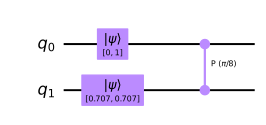

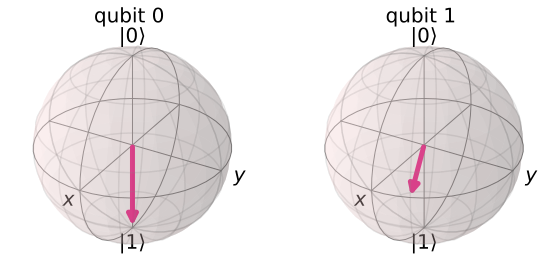

<IPython.core.display.Math object>

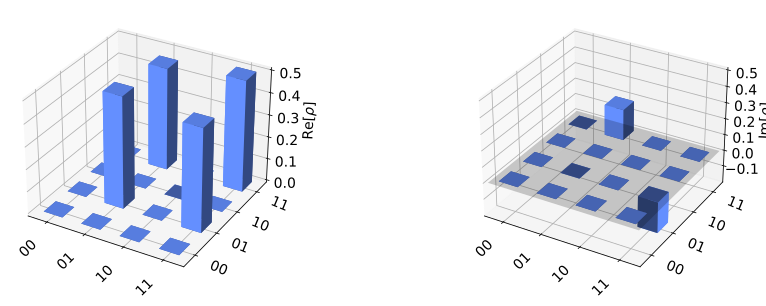

Reversed density matrix = 
 0.000  0.000j     0.000  0.000j     0.000  0.000j     0.000  0.000j    
 0.000  0.000j     0.000  0.000j     0.000  0.000j     0.000  0.000j    
 0.000  0.000j     0.000  0.000j     0.500  0.000j     0.462 -0.191j    
 0.000  0.000j     0.000  0.000j     0.462  0.191j     0.500  0.000j    


In [6]:
from math import sqrt

zero = [1.0, 0.0]
one =  [0.0, 1.0]

isq2 = 1.0 / sqrt(2.0) 
isq2j = isq2 * 1.0j

plus = [isq2, isq2]
minus = [isq2, -isq2]

apply_crotz(control=one, target=plus, angle=pi/8)